# Ce notebook permet de préparer la table et les variables pour réaliser le score de churn du TP

# Sommaire

1. [Import](#sect1)
2. [Nettoyage des données](#sect2)
3. [Export des données pour le notebook "ModelesPridictifChurn"](#sect3)
4. [Analyse descriptive sur les données normalisées](#sect4)

In [3]:
import pandas as pd
import numpy as np
import os
repertoire = "/home/jupyter/python_ml/data/"
os.chdir(repertoire)

# 1. Import <a name="sect1" ></a> 

### Data -> données de score d'attrition dans le secteur des Telco

In [4]:
churn_df = pd.read_csv('churn.csv')

In [5]:
churn_df.shape

(3333, 21)

In [6]:
churn_df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
churn_df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [8]:
churn_df.dtypes


State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

# 2. Nettoyage des données <a name="sect2" ></a> 

In [9]:
# Types des colonnes pour transformation
feat_quali = ['Area Code']
feat_quanti = [ 'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls']
feat_bool = ["Int'l Plan",'VMail Plan']
target = "Churn?"

In [10]:
# Area Code -> Catégorielle
churn_df['Area Code']=churn_df['Area Code'].astype(str)


In [11]:
# Transformation de la variable Target en numérique
churn_df.loc[churn_df['Churn?'] == "True.",'Churn?'] = 1
churn_df.loc[churn_df['Churn?'] == "False.",'Churn?'] = 0

y = churn_df['Churn?'].astype(int)
# 14,5% de Churners
print(y.mean())

0.14491449144914492


In [12]:
# Transformation des booléens en Numpy Bool
for col in feat_bool:
        churn_df[col] = churn_df[col] == "yes"

In [13]:
stats = churn_df.describe(include='all')
stats.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Length,3333,NaN,NaN,NaN,101.065,39.8221,1,74,101,127,243
Area Code,3333,3,415,1655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phone,3333,3333,371-3498,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Int'l Plan,3333,2,False,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Plan,3333,2,False,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Message,3333,NaN,NaN,NaN,8.09901,13.6884,0,0,0,20,51
Day Mins,3333,NaN,NaN,NaN,179.775,54.4674,0,143.7,179.4,216.4,350.8
Day Calls,3333,NaN,NaN,NaN,100.436,20.0691,0,87,101,114,165
Day Charge,3333,NaN,NaN,NaN,30.5623,9.25943,0,24.43,30.5,36.79,59.64


##### Analyse de quelques variables catégorielles 

In [14]:
# Analyse des liens entre la variable catégorielle "Area Code" afin de recoder : 
# semble ne pas avoir de lien mais conservation de la colonne pour des liens non binaires
print(pd.crosstab(churn_df['Area Code'],y, normalize='index'))


Churn?            0         1
Area Code                    
408        0.854415  0.145585
415        0.857402  0.142598
510        0.851190  0.148810


In [15]:
# par contre les deux var qui indiquent si le client paie pour un service international ou VM sont très discriminantes
print(pd.crosstab(churn_df["Int'l Plan"],y, normalize='index'))
print(pd.crosstab(churn_df["VMail Plan"],y, normalize='index'))

Churn?             0         1
Int'l Plan                    
False       0.885050  0.114950
True        0.575851  0.424149
Churn?             0         1
VMail Plan                    
False       0.832849  0.167151
True        0.913232  0.086768


In [16]:
# étude du state
print(pd.crosstab(churn_df['State'],y,normalize='index'))

Churn?         0         1
State                     
AK      0.942308  0.057692
AL      0.900000  0.100000
AR      0.800000  0.200000
AZ      0.937500  0.062500
CA      0.735294  0.264706
CO      0.863636  0.136364
CT      0.837838  0.162162
DC      0.907407  0.092593
DE      0.852459  0.147541
FL      0.873016  0.126984
GA      0.851852  0.148148
HI      0.943396  0.056604
IA      0.931818  0.068182
ID      0.876712  0.123288
IL      0.913793  0.086207
IN      0.873239  0.126761
KS      0.814286  0.185714
KY      0.864407  0.135593
LA      0.921569  0.078431
MA      0.830769  0.169231
MD      0.757143  0.242857
ME      0.790323  0.209677
MI      0.780822  0.219178
MN      0.821429  0.178571
MO      0.888889  0.111111
MS      0.784615  0.215385
MT      0.794118  0.205882
NC      0.838235  0.161765
ND      0.903226  0.096774
NE      0.918033  0.081967
NH      0.839286  0.160714
NJ      0.735294  0.264706
NM      0.903226  0.096774
NV      0.787879  0.212121
NY      0.819277  0.180723
O

In [17]:
len(churn_df['State'].unique())
# 51 valeurs
# soit on garde et on crée des dummy
# soit on créé des regroupements "métiers" (non abordé dans la formation)

51

Dichotomisation des variables qualitative 

In [18]:
# les dummies
churn_df = pd.get_dummies(churn_df,columns=feat_quali, drop_first=True)

In [19]:
churn_df.head()

,State,Account Length,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Area Code_415,Area Code_510
0,KS,128,382-4657,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,OH,107,371-7191,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,NJ,137,358-1921,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,OH,84,375-9999,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,OK,75,330-6626,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [20]:
#############################################################################################
# Traitement du state en  remplacant l'état par la moyenne de y dans chaque état
# Faire ce travail c'est déjà faire un modèle simple donc il faut absolument refaire l'échantillon d'apprentissage
#############################################################################################
# split Apprentissage Test
from sklearn.model_selection import train_test_split 
state_train, state_test, y_train, y_test = train_test_split(churn_df['State'],y,  test_size=0.3,random_state=42)


In [21]:
taux_reponse_state_train=pd.crosstab(state_train,y_train).apply(lambda r: r/r.sum(), axis=1)[1]
taux_reponse_state_test=pd.crosstab(state_test,y_test).apply(lambda r: r/r.sum(), axis=1)[1]
print(taux_reponse_state_train) # churn par état

State
AK    0.078947
AL    0.074074
AR    0.289474
AZ    0.068182
CA    0.200000
CO    0.104167
CT    0.142857
DC    0.078947
DE    0.095238
FL    0.130435
GA    0.195122
HI    0.076923
IA    0.035714
ID    0.100000
IL    0.100000
IN    0.191489
KS    0.191489
KY    0.159091
LA    0.076923
MA    0.127660
MD    0.254902
ME    0.205128
MI    0.218182
MN    0.193548
MO    0.083333
MS    0.190476
MT    0.217391
NC    0.181818
ND    0.048780
NE    0.125000
NH    0.157895
NJ    0.265306
NM    0.108696
NV    0.244444
NY    0.181818
OH    0.137931
OK    0.142857
OR    0.204082
PA    0.212121
RI    0.085106
SC    0.230769
SD    0.106383
TN    0.121951
TX    0.236364
UT    0.108696
VA    0.090909
VT    0.062500
WA    0.176471
WI    0.083333
WV    0.101449
WY    0.125000
Name: 1, dtype: float64


In [22]:
print(taux_reponse_state_test) 

State
AK    0.000000
AL    0.153846
AR    0.000000
AZ    0.050000
CA    0.444444
CO    0.222222
CT    0.200000
DC    0.125000
DE    0.263158
FL    0.117647
GA    0.000000
HI    0.000000
IA    0.125000
ID    0.173913
IL    0.055556
IN    0.000000
KS    0.173913
KY    0.066667
LA    0.083333
MA    0.277778
MD    0.210526
ME    0.217391
MI    0.222222
MN    0.136364
MO    0.200000
MS    0.260870
MT    0.181818
NC    0.125000
ND    0.190476
NE    0.034483
NH    0.166667
NJ    0.263158
NM    0.062500
NV    0.142857
NY    0.178571
OH    0.100000
OK    0.157895
OR    0.034483
PA    0.083333
RI    0.111111
SC    0.238095
SD    0.230769
TN    0.000000
TX    0.294118
UT    0.192308
VA    0.000000
VT    0.200000
WA    0.333333
WI    0.111111
WV    0.081081
WY    0.095238
Name: 1, dtype: float64


In [23]:
del state_test,y_test,  taux_reponse_state_test
del state_train
# on remplace le state par le taux de reponse associé
list(taux_reponse_state_train)
# replace une liste par une liste
churn_df['State'].replace(list(taux_reponse_state_train.index), list(taux_reponse_state_train), inplace=True)
churn_df.rename(columns={"State": "churnMoy_state"},inplace=True)

Suppression de variables inutiles

In [24]:
to_drop=['Phone']
churn_df = churn_df.drop(to_drop,axis=1)
churn_df.describe()


,churnMoy_state,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Area Code_415,Area Code_510
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.145772,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.496550,0.252025
std,0.061771,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.500063,0.434241
min,0.035714,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.095238,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000
50%,0.130435,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000
75%,0.193548,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,1.000000,1.000000
max,0.289474,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000


In [25]:
churn_df.columns

Index(['churnMoy_state', 'Account Length', 'Int'l Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?',
       'Area Code_415', 'Area Code_510'],
      dtype='object')

# 3. Export <a name="sect3" ></a> 

In [27]:
import pickle
file=open("churn_prepared.pydata","wb")
pickle.dump(churn_df,file)
file.close()

# 4. Analyse descriptive descriptive <a name="sect4" ></a>

In [173]:
# Décupage entre variables explicatives et target
X = churn_df.drop(target, axis=1)
y = churn_df[target]

D'abord on normalise les données afin d'avoir des analyses comparables sur la même échelle

In [174]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler().fit(X) 
X_norm = norm.transform(X) 
# ou 
# X = StandardScaler().fit_transform(X)

In [175]:
X_norm = pd.DataFrame(X_norm)
# on récupère les noms de col
X_norm.columns = X.columns
X_norm.shape


(3333, 19)

In [176]:
# Taux moyen de 14.4% de churners
y.mean()

0.14491449144914492

In [177]:
X_norm.describe()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Area Code_415,Area Code_510
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.713134e-16,-1.021951e-16,6.921823e-17,3.832651e-16,7.081711e-16,-2.150828e-16,-3.226409e-16,-1.067919e-16,3.527531e-16,1.266447e-16,6.602046e-17,-7.041739e-17,-3.134473e-17,-3.274375e-16,-1.264615e-16,2.785384e-16,3.275708e-16,8.076348e-16,3.511209e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.513172e+00,-3.275805e-01,-6.183963e-01,-5.917599e-01,-3.301096e+00,-5.005247e+00,-3.301162e+00,-3.963622e+00,-5.025911e+00,-3.963679e+00,-3.513648e+00,-3.429870e+00,-3.515366e+00,-3.667413e+00,-1.820289e+00,-3.668210e+00,-1.188218e+00,-9.931230e-01,-5.804683e-01
25%,-6.797448e-01,-3.275805e-01,-6.183963e-01,-5.917599e-01,-6.624241e-01,-6.695701e-01,-6.623760e-01,-6.780300e-01,-6.583610e-01,-6.783123e-01,-6.698545e-01,-6.699340e-01,-6.676792e-01,-6.223690e-01,-6.011951e-01,-6.164341e-01,-4.279320e-01,-9.931230e-01,-5.804683e-01
50%,-1.627644e-03,-3.275805e-01,-6.183963e-01,-5.917599e-01,-6.887677e-03,2.812491e-02,-6.730063e-03,8.276141e-03,-5.738630e-03,8.459274e-03,6.485803e-03,-5.505089e-03,4.691242e-03,2.246393e-02,-1.948306e-01,2.045823e-02,-4.279320e-01,-9.931230e-01,-5.804683e-01
75%,6.513740e-01,-3.275805e-01,1.617086e+00,8.695542e-01,6.725198e-01,6.759846e-01,6.726790e-01,6.768330e-01,6.970854e-01,6.766695e-01,6.808485e-01,6.589239e-01,6.814562e-01,6.672969e-01,6.178983e-01,6.706192e-01,3.323545e-01,1.006925e+00,1.722747e+00
max,3.564766e+00,3.052685e+00,1.617086e+00,3.134591e+00,3.140422e+00,3.217588e+00,3.140803e+00,3.209066e+00,3.508382e+00,3.207980e+00,3.839081e+00,3.827739e+00,3.836763e+00,3.497397e+00,6.307001e+00,3.496829e+00,5.654360e+00,1.006925e+00,1.722747e+00


In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul du nb de lignes et colonnes à ajouter pour la data viz
nb_feat = len(X_norm.columns) 
n_col = 3
n_rows = nb_feat // n_col
if (nb_feat % n_col) > 0:
    n_rows += 1

n_col,  n_rows

(3, 7)

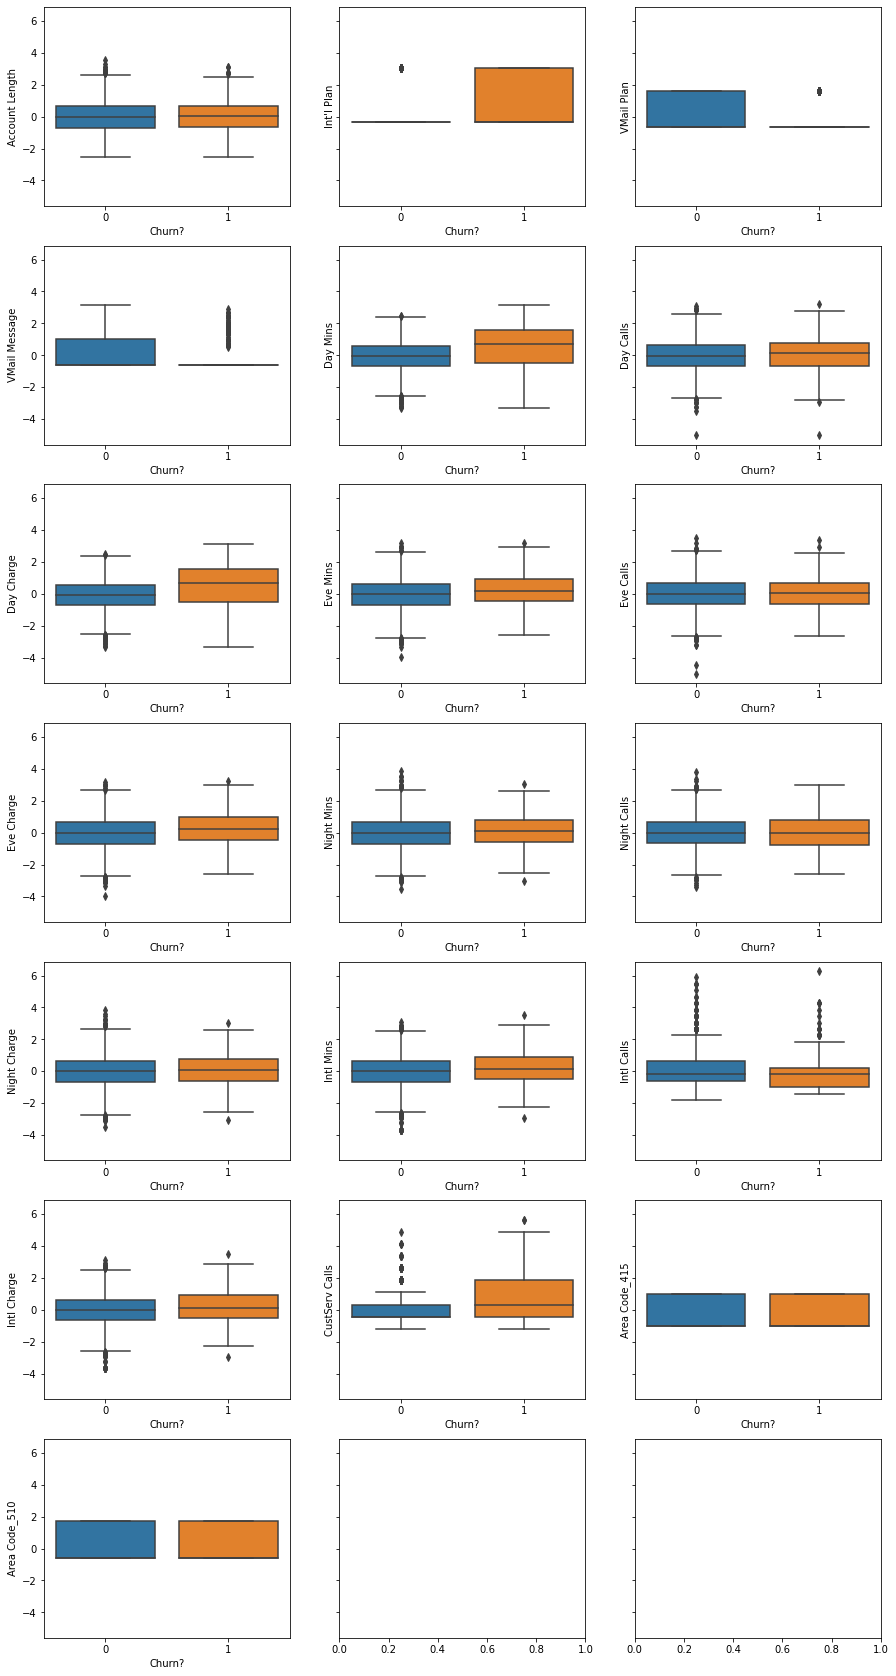

In [179]:
fig, axes = plt.subplots(n_rows, n_col, figsize=(15, 30), sharey=True)

r = 0
c = 0
for col in X_norm.columns:
    if c < (n_col - 1):
        sns.boxplot(ax=axes[r][c], x = y, y=X_norm[col])
        
    elif c == (n_col - 1):
        sns.boxplot(ax=axes[r][c], x = y, y=X_norm[col])
        r += 1
    else:
        c = 0
        sns.boxplot(ax=axes[r][c], x = y, y=X_norm[col])
    c += 1

In [180]:
# tri croisé des var quali
for i in ("Int'l Plan","VMail Plan","Area Code_415","Area Code_510"):
    print(pd.crosstab(X_norm[i], y, normalize=0))

Churn?             0         1
Int'l Plan                    
-0.327580   0.885050  0.114950
 3.052685   0.575851  0.424149
Churn?             0         1
VMail Plan                    
-0.618396   0.832849  0.167151
 1.617086   0.913232  0.086768
Churn?                0         1
Area Code_415                    
-0.993123      0.852801  0.147199
 1.006925      0.857402  0.142598
Churn?                0         1
Area Code_510                    
-0.580468      0.856398  0.143602
 1.722747      0.851190  0.148810
